# Load Wisconsin Breast Cancer Dataset

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [98]:
# load data
ds = pd.read_csv('C:/Users/Bangga Rakana Adian/Desktop/Kuliah/python/breast-cancer.csv')
y = ds['diagnosis'].replace(('M', 'B'), (0,1))
x = ds.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)

In [99]:
print('x: {} \n\n y: {}'.format(x,y))

x:      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0         17.990         10.38          122.80     1001.0          0.11840   
1         20.570         17.77          132.90     1326.0          0.08474   
2         19.690         21.25          130.00     1203.0          0.10960   
3         11.420         20.38           77.58      386.1          0.14250   
4         20.290         14.34          135.10     1297.0          0.10030   
5         12.450         15.70           82.57      477.1          0.12780   
6         18.250         19.98          119.60     1040.0          0.09463   
7         13.710         20.83           90.20      577.9          0.11890   
8         13.000         21.82           87.50      519.8          0.12730   
9         12.460         24.04           83.97      475.9          0.11860   
10        16.020         23.24          102.70      797.8          0.08206   
11        15.780         17.89          103.60      781.0    

# Partition based Clustering Example

In [73]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=10)
km.fit(x)

labels = km.labels_
centers = km.cluster_centers_
print(labels[:5])

[0 0 0 1 0]


In [74]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
bc_pca = pca.fit_transform(x)

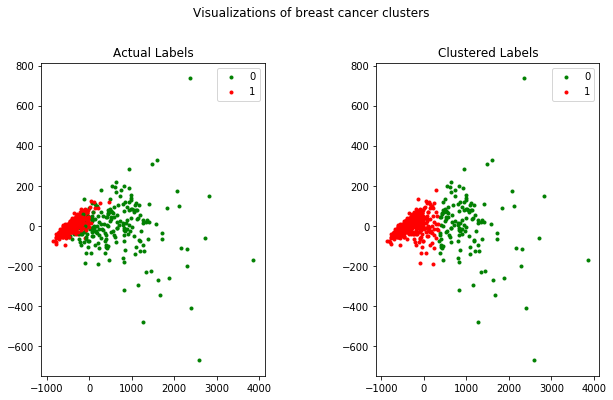

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle('Visualizations of breast cancer clusters')
fig.subplots_adjust(top=0.85, wspace=0.5)
ax1.set_title('Actual Labels')
ax2.set_title('Clustered Labels')

for i in range(len(y)):
    if y[i] == 0:
        c1 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if y[i] == 1:
        c2 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')
        
    if labels[i] == 0:
        c3 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if labels[i] == 1:
        c4 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')

l1 = ax1.legend([c1, c2], ['0', '1'])
l2 = ax2.legend([c3, c4], ['0', '1'])

# Hierarchical Clustering Example

In [76]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
np.set_printoptions(suppress=True)

Z = linkage(x, 'ward')
print(Z)

[[  287.           336.             3.81596727     2.        ]
 [  106.           420.             4.11664267     2.        ]
 [   55.           251.             4.93361024     2.        ]
 ...
 [ 1130.          1132.          6196.07482529    86.        ]
 [ 1131.          1133.          8368.99225244   483.        ]
 [ 1134.          1135.         18371.10293626   569.        ]]


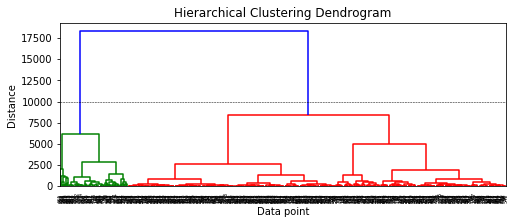

In [77]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=10000, c='k', ls='--', lw=0.5)
plt.show()

In [78]:
from scipy.cluster.hierarchy import fcluster

max_dist = 10000
hc_labels = fcluster(Z, max_dist, criterion='distance')

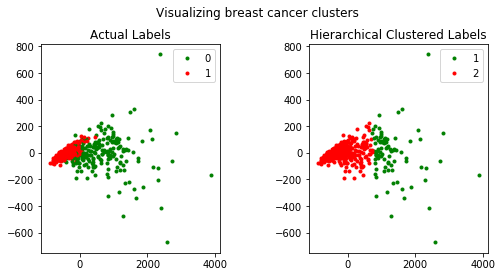

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Visualizing breast cancer clusters')
fig.subplots_adjust(top=0.85, wspace=0.5)
ax1.set_title('Actual Labels')
ax2.set_title('Hierarchical Clustered Labels')

for i in range(len(y)):
    if y[i] == 0:
        c1 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if y[i] == 1:
        c2 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')
        
    if hc_labels[i] == 1:
        c3 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if hc_labels[i] == 2:
        c4 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')

l1 = ax1.legend([c1, c2], ['0', '1'])
l2 = ax2.legend([c3, c4], ['1', '2'])

# Classification Model Evaluation Metrics

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(X_train.shape, y_test.shape)

(398, 30) (171,)


In [81]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression()
logistic.fit(X_train,y_train)

C:\Users\Bangga Rakana Adian\Anaconda3\envs\mentoring_rm_3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Confusion Matrix

In [82]:
import model_evaluation_utils as meu
import sklearn.metrics as metrics
y_pred = logistic.predict(X_test)
metrics.confusion_matrix(y_test,y_pred)

array([[ 59,   4],
       [  2, 106]], dtype=int64)

## True Positive, False Positive, True Negative and False Negative

In [83]:
positive_class = 1
TP = 106
FP = 4
TN = 59
FN = 2

## Accuracy

In [84]:
fw_acc = round(metrics.accuracy_score(y_test,y_pred),5)
print('Framework Accuracy:', fw_acc)


Framework Accuracy: 0.96491


## Precision

In [85]:
fw_prec = round(metrics.precision_score(y_test, y_pred), 5)
print('Framework Precision:', fw_prec)


Framework Precision: 0.96364


## Recall

In [86]:
fw_rec = round(metrics.recall_score(y_test, y_pred), 5)
print('Framework Recall:', fw_rec)


Framework Recall: 0.98148


## F1-Score

In [87]:
fw_f1 = round(metrics.f1_score(y_test,y_pred), 5)
print('Framework F1-Score:', fw_f1)


Framework F1-Score: 0.97248


## ROC Curve and AUC

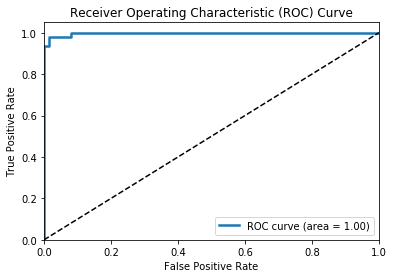

In [88]:
meu.plot_model_roc_curve(clf=logistic, features=X_test, true_labels=y_test)

# Clustering Model Evaluation Metrics

## Build two clustering models on the breast cancer dataset

In [89]:
km2 = KMeans(n_clusters=2, random_state=42).fit(x)
km2_labels = km2.labels_

km5 = KMeans(n_clusters=5, random_state=42).fit(x)
km5_labels = km5.labels_

## Silhouette Coefficient

In [90]:
from sklearn import metrics

km2_silc = metrics.silhouette_score(x, km2_labels, metric='euclidean')
km5_silc = metrics.silhouette_score(x, km5_labels, metric='euclidean')

print('Silhouette Coefficient for num clusters=2: ', km2_silc)
print('Silhouette Coefficient for num clusters=5: ', km5_silc)

Silhouette Coefficient for num clusters=2:  0.6972646156059465
Silhouette Coefficient for num clusters=5:  0.510229299790784


# Model tuning

## Build and Evaluate Default Model

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# prepare datasets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# build default SVM model
def_svc = SVC(random_state=42)
def_svc.fit(X_train, y_train)

# predict and evaluate performance
def_y_pred = def_svc.predict(X_test)
print('Default Model Stats:')
meu.display_model_performance_metrics(true_labels=y_test, predicted_labels=def_y_pred, classes=[0,1])

Default Model Stats:
Model Performance metrics:
------------------------------
Accuracy: 0.6316
Precision: 0.3989
Recall: 0.6316
F1 Score: 0.489

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.63      1.00      0.77       108

   micro avg       0.63      0.63      0.63       171
   macro avg       0.32      0.50      0.39       171
weighted avg       0.40      0.63      0.49       171


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   0    1
Actual: 0          0   63
        1          0  108


C:\Users\Bangga Rakana Adian\Anaconda3\envs\mentoring_rm_3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Bangga Rakana Adian\Anaconda3\envs\mentoring_rm_3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bangga Rakana Adian\Anaconda3\envs\mentoring_rm_3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bangga Rakana Adian\Anaconda3\envs\mentoring_rm_3\lib\site-packages\sklearn\metrics\classification.py:1143: Un

## Tune Model with Grid Search

In [92]:
from sklearn.model_selection import GridSearchCV

# setting the parameter grid
grid_parameters = {'kernel': ['linear', 'rbf'], 
                   'gamma': [1e-3, 1e-4],
                   'C': [1, 10, 50, 100]}

# perform hyperparameter tuning
print("# Tuning hyper-parameters for accuracy\n")
clf = GridSearchCV(SVC(random_state=42), grid_parameters, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)
# view accuracy scores for all the models
print("Grid scores for all the models based on CV:\n")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.5f (+/-%0.05f) for %r" % (mean, std * 2, params))
# check out best model performance
print("\nBest parameters set found on development set:", clf.best_params_)
print("Best model validation accuracy:", clf.best_score_)

# Tuning hyper-parameters for accuracy



C:\Users\Bangga Rakana Adian\Anaconda3\envs\mentoring_rm_3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Grid scores for all the models based on CV:

0.95226 (+/-0.06310) for {'C': 1, 'kernel': 'linear', 'gamma': 0.001}
0.91206 (+/-0.04540) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.001}
0.95226 (+/-0.06310) for {'C': 1, 'kernel': 'linear', 'gamma': 0.0001}
0.92462 (+/-0.02338) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.0001}
0.96231 (+/-0.04297) for {'C': 10, 'kernel': 'linear', 'gamma': 0.001}
0.90201 (+/-0.04734) for {'C': 10, 'kernel': 'rbf', 'gamma': 0.001}
0.96231 (+/-0.04297) for {'C': 10, 'kernel': 'linear', 'gamma': 0.0001}
0.92965 (+/-0.03425) for {'C': 10, 'kernel': 'rbf', 'gamma': 0.0001}
0.95729 (+/-0.05989) for {'C': 50, 'kernel': 'linear', 'gamma': 0.001}
0.90201 (+/-0.04734) for {'C': 50, 'kernel': 'rbf', 'gamma': 0.001}
0.95729 (+/-0.05989) for {'C': 50, 'kernel': 'linear', 'gamma': 0.0001}
0.93467 (+/-0.02975) for {'C': 50, 'kernel': 'rbf', 'gamma': 0.0001}
0.95477 (+/-0.05772) for {'C': 100, 'kernel': 'linear', 'gamma': 0.001}
0.90201 (+/-0.04734) for {'C': 100, 'kernel': '

## Evaluate Grid Search Tuned Model

In [93]:
gs_best = clf.best_estimator_
tuned_y_pred = gs_best.predict(X_test)

print('\n\nTuned Model Stats:')
meu.display_model_performance_metrics(true_labels=y_test, predicted_labels=tuned_y_pred, classes=[0,1])



Tuned Model Stats:
Model Performance metrics:
------------------------------
Accuracy: 0.9708
Precision: 0.9709
Recall: 0.9708
F1 Score: 0.9708

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

   micro avg       0.97      0.97      0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   0    1
Actual: 0         61    2
        1          3  105


## Tune Model with Randomized Search

In [94]:
import scipy
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'C': scipy.stats.expon(scale=10), 
              'gamma': scipy.stats.expon(scale=.1),
              'kernel': ['rbf', 'linear']}
#C: penalty parameter of error term
#gamma:
random_search = RandomizedSearchCV(SVC(random_state=42), param_distributions=param_grid,
                                   n_iter=50, cv=5)
random_search.fit(X_train, y_train)

print("Best parameters set found on development set:")
random_search.best_params_

C:\Users\Bangga Rakana Adian\Anaconda3\envs\mentoring_rm_3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set found on development set:


{'C': 16.383075364125, 'gamma': 0.035715835304634416, 'kernel': 'linear'}

# Model Deployment

## Persist model to disk

In [95]:
from sklearn.externals import joblib
joblib.dump(logistic, 'lr_model.pkl') 

['lr_model.pkl']

## Load model from disk

In [96]:
lr = joblib.load('lr_model.pkl') 
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Predict with loaded model

In [108]:
print(lr.predict(X_test[0:11]))

[1 0 0 1 1 0 0 0 1 1 1]
